# Tests. Spectrum/QNMs calculations. Standard and Hyperboloidal set-ups

## Standard Cauchy Setup

**Standard setup**:
The equation we are interested in  is
\begin{equation}
(\partial_t^2-\partial_x^2 +V(x))\phi=0.
\end{equation}
Defining
$\psi=\partial_t \phi$ we get the first order in time, second order in
space reduced equation:
\begin{equation}
\partial_t \begin{pmatrix} \phi \\ \Psi \end{pmatrix} = \begin{pmatrix} 0 & 1
\\ \partial_x^2-V(x) & 0 \end{pmatrix}\begin{pmatrix} \phi \\ \Psi \end{pmatrix}
\end{equation}
Let $u=(\phi, \Psi)^T$ then we can write the above equation as $\partial_t u = P u$ 
with \begin{equation} P = \begin{pmatrix} 0 & 1
\\ \partial_x^2-V(x) & 0 \end{pmatrix}  \end{equation}
then applying the Fourier transform  (unitary angular frequency definition) we get, the equation $
Pu = i\omega u $
Thus, defining $L = -i P$ we are left with the Eigenvalue problem
\begin{equation}
L u =  \omega u
\end{equation}


## Hyperboloidal setup

In contrast the **hyperboloidal setup** is given in eq (3) of Jaramillo, Panosso-Macedo, Al-Sheik paper.
In this setup we have

\begin{align}
L u = \omega B u
\end{align}

Where $L$ is constructed from $L_1 = (1-y^2)((1-y^2)\partial_y^2 - 2y\partial_y) - V $ and $
L_2 = (1-y^2)(-2y\partial_y - 1)$ and $B$ is given by

\begin{equation}B = \begin{pmatrix} 0 & 1
\\ 0 & (1-y^2) \end{pmatrix} \end{equation}

In this form, posh-teller corresponds to $V = \gamma(1-y^2) $

In [1]:
## Importation of basic rotutine
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import ticker, cm
from scipy import linalg as LA
from math import sin, cos, tanh, cosh, pi, log
import cmath
import import_ipynb

## Importation of Spectral tools
from SpectrumCalculator import *

importing Jupyter notebook from SpectrumCalculator.ipynb


## Hyperboloidal setup implementation

In [2]:
N = 16
n=N+1
# Spectral Differentiation, identity and Zero matrices
xt = [D1_CG(N)[0]]
x = np.transpose(xt)
D1 = D1_CG(N)[1]
D2 = D2_CG(N)[1]
Id = np.eye(N+1)
Id_total = np.eye(2*(N+1))
Zero = np.zeros((N+1,N+1))

In [3]:
# Elementary Operators Version 2
alpha, beta, gamma = 0., 0., 1.
print("alpha =", alpha, ", beta =", beta, ", gamma =", gamma)
V = alpha + beta*x + gamma*(1-x**2) 
L1 = (1-x**2)*((1-x**2)*D2 - 2*x*D1) - V*Id 
L2 = (1-x**2)*(-2*x*D1 - Id)
#EG: why don't we divide all by (1-x**2) for posch-teller. # EG: Understood now
Bu = np.concatenate((Id,Zero), axis=1)
Bd = np.concatenate((Zero,(1-x**2)*Id), axis=1)
B = np.concatenate((Bu,Bd), axis=0)
# EG: why is B chosen like this # EG: Understood now


Lu = np.concatenate((Zero,Id), axis=1)
Ld = np.concatenate((L1,L2), axis=1)
L = np.concatenate((Lu,Ld), axis=0)
    
     
L = -1j*L

alpha = 0.0 , beta = 0.0 , gamma = 1.0


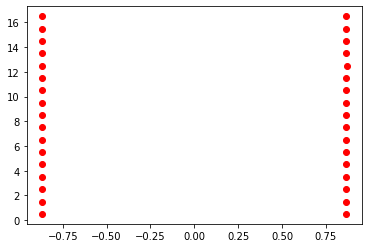

In [4]:
SpectrumAlt(L,B);
CorrectAnswer = plt.plot(SpectrumAlt(L,B).real, SpectrumAlt(L,B).imag,'ro')

## Standard setup implementation 
### Trying to impose outgoing boundary conditions at finite radius 
#### Case: Outgoing BC at x=-1 and x=1.

In [5]:
# Let's get back to the standard non hyperboloidal problem.
# Let's see if we impose outgoing boundary conditions we get the correct spectrum

# We want to impose (D phi)_0 = -i w phi_0  and (D phi)_N = i w phi_N
# Recall that in Lobato (Gauss) x_0 corresponds to 1, and x_N corresponds to -1.

In [6]:
N = 16
n=N+1
# Spectral Differentiation, identity and Zero matrices
xt = [D1_CG(N)[0]]
x = np.transpose(xt)
D1 = D1_CG(N)[1]
D2 = D2_CG(N)[1]
Id = np.eye(N+1)
Id_total = np.eye(2*(N+1))
Zero = np.zeros((N+1,N+1))

In [7]:
# Potential
# Posch-Teller 
V0=5.0
Vpt= V0*(1.0/np.cosh(x))**2

In [8]:
Pcorner=D2-Vpt*Id
Ptop=np.concatenate((Zero,Id),axis=1)
Pbottom=np.concatenate((Pcorner,Zero),axis=1)
P=np.concatenate((Ptop,Pbottom),axis=0)
L=-1j*P

<img src="files/L_mod.jpg" width="600">

Outgoing Boundary Conditions: $(D \phi)_0 = -i w \phi_0 \;\; $ and $\;\; (D \phi)_N = i w \phi_N$

In [9]:
# In the last image xbar = x and a= 1.


L_mod=L

# we modify the first n=N+1, elements of the first line and susbtitute that for the corresponding line
# of the diferentiation operator. This is to have (D phi)_0 on the left-hand side of the equation
L_mod[0][0:n] = D1[0]
# we modify the first n=N+1, elements of the N-th line and susbtitute that for the corresponding line
# of the diferentiation operator. This is to have (D phi)_N on the left-hand side of the equation
L_mod[N][0:n]= D1[N]



Id_total_mod = Id_total

# we modify the first n=N+1, elements of the first line by (-i, 0,0,0,0,...,0). 
# This is to have -i w phi_0 on the right-hand side of the equation
Id_total_mod[0][0:n]= np.concatenate((-1j*np.ones(1),np.zeros(N)))
# we modify the first n=N+1, elements of the N-th line by (0, 0,0,0,0,...,0,i). 
# This is to have i w phi_N on the right-hand side of the equation
Id_total_mod[N][0:n]= np.concatenate((np.zeros(N),1j*np.ones(1)))

/home/gasperin/anaconda3/envs/rel/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/gasperin/anaconda3/envs/rel/lib/python3.6/site-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


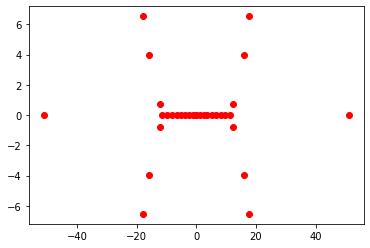

In [10]:
SpectrumAlt(L_mod,Id_total_mod);
plt.plot(SpectrumAlt(L_mod,Id_total_mod).real, SpectrumAlt(L_mod,Id_total_mod).imag,'ro')

### Case: Outgoing BC at x=-|a| and x=|a|.

In [11]:
# Is this ameliorated if we map the interval (-1,1) to (-a,a) with a>0?

Consider a linear tranformation to transform the interval $[-1,1]$ to $[c,d]$. 

Taking    
\begin{equation}
z = \frac{c+d}{2} + \bigg(\frac{d-c}{2}\bigg)x
\end{equation}
we map $\; \;$ $x \in [-1,1]$ $\;\;$ to $\; \;$ $z \in [c,d]$.

The inverse map is given by
\begin{equation}
x = \frac{c+d}{c-d} - \bigg(\frac{2}{c-d}\bigg)z
\end{equation}
Similarly the derivatives are related via.
\begin{equation}
D_z  = \frac{dx}{dz} D_x  \;\; \text{namely} \;\; D_z  =  \bigg(\frac{2}{d-c}\bigg) D_x 
\end{equation}
Similarly,
\begin{equation}
D_x  = \frac{dz}{dx} D_z  \;\; \text{namely} \;\; D_x  =  \bigg(\frac{d-c}{2}\bigg) D_z 
\end{equation}



In [12]:
N = 16
n=N+1
# Spectral Differentiation, identity and Zero matrices
xt =  [D1_CL(N)[0]]
x = np.transpose(xt)
D1 =  D1_CL(N)[1]
D2 =  D2_CL(N)[1]
Id = np.eye(N+1)
Id_total = np.eye(2*(N+1))
Zero = np.zeros((N+1,N+1))

########## rescaling domain ######
# x in (-1 , 1), z in  (c , d)

c = -1000 #Large distance
d = 1000 #Large distance
z =(c+d)/2 + (d-c)/2*x
D1_z= (2/(d-c))*D1
D2_z = ((2/(d-c))**2) * D2

In [13]:
V0= 1.0
Vpt= V0*(1.0/np.cosh(z))**2

Pcorner=D2_z-Vpt*Id
Ptop=np.concatenate((Zero,Id),axis=1)
Pbottom=np.concatenate((Pcorner,Zero),axis=1)
P=np.concatenate((Ptop,Pbottom),axis=0)
L=-1j*P


/home/gasperin/anaconda3/envs/rel/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  


<img src="files/L_mod.jpg" width="600">

Outgoing Boundary Conditions: $(D \phi)_0 = -i w \phi_0 \;\; $ and $\;\; (D \phi)_N = i w \phi_N$

In [14]:
L_mod=L
L_mod[0][0:n] = D1_z[0]
L_mod[N][0:n]= D1_z[N]
Id_total_mod = Id_total
Id_total_mod[0][0:n]= np.concatenate((-1j*np.ones(1),np.zeros(N)))
Id_total_mod[N][0:n]= np.concatenate((np.zeros(N),1j*np.ones(1)))

/home/gasperin/anaconda3/envs/rel/lib/python3.6/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/gasperin/anaconda3/envs/rel/lib/python3.6/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


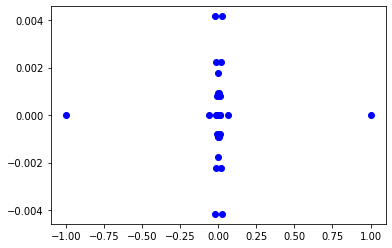

In [15]:
SpectrumAlt(L_mod,Id_total_mod);
#plt.xlim((-1,1))
#plt.ylim((-10,10))
ImposingFiniteRadiusBC=plt.plot(SpectrumAlt(L_mod,Id_total_mod).real, SpectrumAlt(L_mod,Id_total_mod).imag,'bo')